# Final Project - Naive Bayesian Model
---
Student Names: Kathleen Arrington, Sam Crane, Erick Perez

GitHub: https://github.com/samofuture/ML-Final-Project

In [16]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
import seaborn as sns; sns.set()

## Preparing the Data
We assign the text 'Graduate', 'Enrolled', and 'Dropout' to the integers 2, 1, and 0 respectively.

In [12]:
def prep_data(dataset) -> pd.DataFrame:
    df = pd.read_csv(dataset)
    df['Target'] = df['Target'].apply(lambda x: 2 if x == 'Graduate' else 1 if x == 'Enrolled' else 0)
    return df

In [13]:
dataset = 'dataset.csv'
df = prep_data(dataset)
target = df.pop('Target').to_numpy()
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0,0.000000,0,10.8,1.4,1.74
1,1,6,1,11,1,1,1,1,3,4,...,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79
2,1,1,5,5,1,1,1,22,27,10,...,0,0,6,0,0,0.000000,0,10.8,1.4,1.74
3,1,8,2,15,1,1,1,23,27,6,...,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12
4,2,12,1,3,0,1,1,22,28,10,...,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,15,1,1,1,1,1,6,...,0,0,6,8,5,12.666667,0,15.5,2.8,-4.06
4420,1,1,2,15,1,1,19,1,1,10,...,0,0,6,6,2,11.000000,0,11.1,0.6,2.02
4421,1,1,1,12,1,1,1,22,27,10,...,0,0,8,9,1,13.500000,0,13.9,-0.3,0.79
4422,1,1,1,9,1,1,1,22,27,8,...,0,0,5,6,5,12.000000,0,9.4,-0.8,-3.12


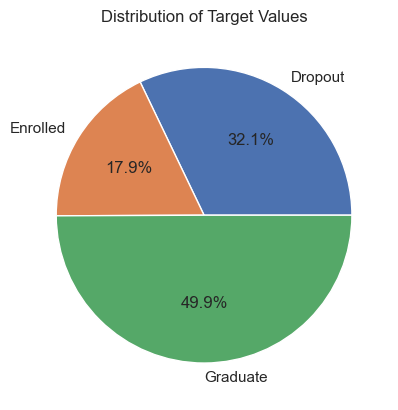

In [83]:
_, counts = np.unique(target, return_counts=True)
plt.pie(counts, labels=['Dropout', 'Enrolled', 'Graduate'], autopct="%1.1f%%")
plt.title("Distribution of Target Values")
plt.show()

In [76]:
def plot_metrics(accuracies, precisions, recalls):
    fig, ax = plt.subplots()
    indices = range(34)
    drop_precisions = [sub_array[0] for sub_array in precisions]
    enrolled_precisions = [sub_array[1] for sub_array in precisions]
    graduate_precisions = [sub_array[2] for sub_array in precisions]

    drop_recalls = [sub_array[0] for sub_array in recalls]
    enrolled_recalls = [sub_array[1] for sub_array in recalls]
    graduate_recalls = [sub_array[2] for sub_array in recalls]

    ax.plot(indices, accuracies, label='Accuracy')
    
    ax.plot(indices, drop_precisions, label='Dropout Precision')
    ax.plot(indices, enrolled_precisions, label='Enrolled Precision')
    ax.plot(indices, graduate_precisions, label='Graduate Precision')
    
    ax.plot(indices, drop_recalls, label='Dropout Recall')
    ax.plot(indices, enrolled_recalls, label='Enrolled Recall')
    ax.plot(indices, graduate_recalls, label='Graduate Recall')

    ax.set_title(f'Naive Bayesian Metrics with Varying K')
    ax.set_xlabel('K')
    ax.set_ylabel('Value')
    ax.legend()
    plt.show()

In [95]:
def find_optimal_k(plot=False):
    k = 34
    max_accuracy = 0
    max_acc_index = 0
    accuracies = []
    precisions = []
    recalls = []
    reports = []
    cnf_matrices = []
    for n in range(1, k+1):
        pc_list = [f'pc{i}' for i in range(n)]
        pca = PCA(n_components=n)
        principalComponents = pca.fit_transform(df)
        principal_df = pd.DataFrame(data=principalComponents, columns=pc_list)
        
        scaler_x = StandardScaler()
        data = scaler_x.fit_transform(principal_df)
        train_input, test_input, train_output, test_output = train_test_split(data, target, test_size=0.2, random_state=15)
        
        model = GaussianNB()

        model.fit(train_input, train_output)
        pred = model.predict(test_input)
        
        cnf_matrix = confusion_matrix(test_output, pred)
        cnf_matrices.append(cnf_matrix)

        acc = metrics.accuracy_score(test_output, pred)
        precision = metrics.precision_score(test_output, pred, average=None)
        recall = metrics.recall_score(test_output, pred, average=None)
        accuracies.append(acc)
        precisions.append(precision)
        recalls.append(recall)
        if acc > max_accuracy:
            max_accuracy = acc
            max_acc_index = n

        reports.append(metrics.classification_report(test_output, pred))
    if plot:
        class_names=['Dropout', 'Enrolled', 'Graduate']
        plot_metrics(accuracies, precisions, recalls)
        

        fig, ax = plt.subplots()
        tick_marks = np.arange(len(class_names))
        plt.xticks(tick_marks, class_names)
        plt.yticks(tick_marks, class_names)
        # create heatmap
        sns.heatmap(pd.DataFrame(cnf_matrices[max_acc_index-1]), annot=True, cmap="YlGnBu" ,fmt='g', xticklabels=class_names, yticklabels=class_names)
        ax.xaxis.set_label_position("top")
        plt.tight_layout()
        plt.title('Confusion matrix', y=1.1)
        plt.ylabel('Actual label')
        plt.xlabel('Predicted label')
        
    print('Optimum K:', max_acc_index)
    print(reports[max_acc_index])
    return reports, max_acc_index


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(

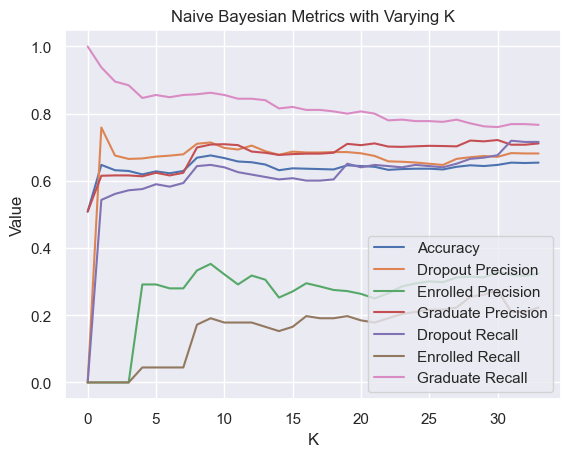

Optimum K: 10
              precision    recall  f1-score   support

           0       0.70      0.64      0.67       278
           1       0.32      0.18      0.23       157
           2       0.71      0.86      0.78       450

    accuracy                           0.67       885
   macro avg       0.58      0.56      0.56       885
weighted avg       0.64      0.67      0.64       885



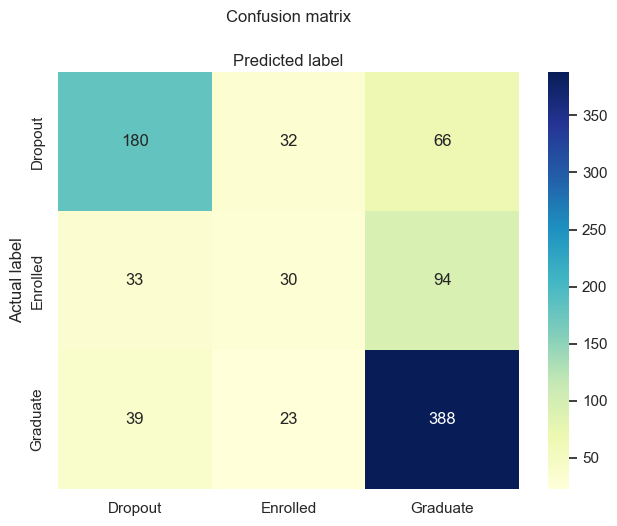

In [96]:
reports, max_acc_index = find_optimal_k(plot=True)